In [202]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [203]:
distance = ctrl.Antecedent(np.arange(0,9,1), 'distance')
speed = ctrl.Antecedent(np.arange(0,101,25), 'speed')
risk = ctrl.Consequent(np.arange(0,121,30), 'risk')

In [204]:
'''distance['very small'] = fuzz.trimf(distance.universe, [0, 0, 3])
distance['small'] = fuzz.trimf(distance.universe, [2, 3, 4])
distance['perfect'] = fuzz.trimf(distance.universe, [3, 4, 5])
distance['large'] = fuzz.trimf(distance.universe, [4, 5, 6])
distance['very large'] = fuzz.trimf(distance.universe, [5, 8, 8])

speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['medium'] = fuzz.trimf(speed.universe, [25, 50, 50])
speed['fast'] = fuzz.trimf(speed.universe, [50, 100, 100])

risk['low'] = fuzz.trimf(risk.universe, [0, 0, 30])
risk['medium'] = fuzz.trimf(risk.universe, [15, 30, 75])
risk['high'] = fuzz.trimf(risk.universe, [60, 60, 120])
risk['very high'] = fuzz.trimf(risk.universe, [105, 120, 120])'''

distance_names = ['very small', 'small', 'perfect', 'large', 'very large']
speed_names = ['slow', 'medium', 'fast']
risk_names = ['low', 'medium', 'high', 'very high']
distance.automf(names=distance_names)
speed.automf(names=speed_names)
risk.automf(names=risk_names)

C:\Users\Coskun\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Coskun\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Coskun\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


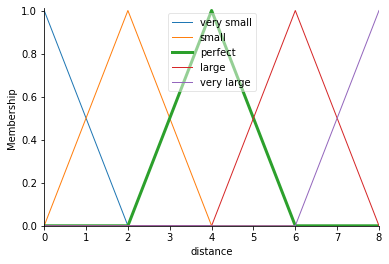

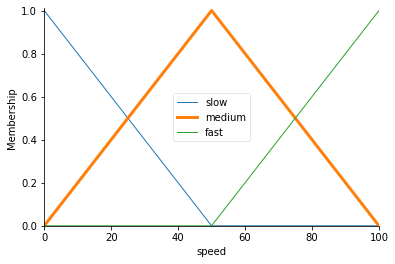

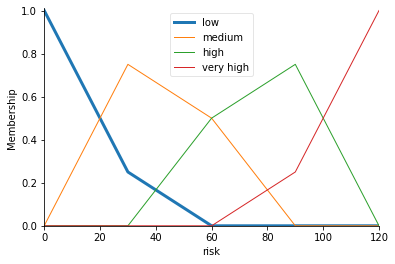

In [205]:
distance['perfect'].view()
speed['medium'].view()
risk['low'].view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

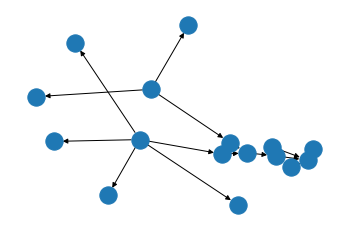

In [206]:
rule1 = ctrl.Rule(distance['very small'] & speed['slow'], risk['high'])
rule2 = ctrl.Rule(distance['very small'] & speed['medium'], risk['very high'])
rule3 = ctrl.Rule(distance['very small'] & speed['fast'], risk['very high'])

rule4 = ctrl.Rule(distance['small'] & speed['slow'], risk['medium'])
rule5 = ctrl.Rule(distance['small'] & speed['medium'], risk['high'])
rule6 = ctrl.Rule(distance['small'] & speed['fast'], risk['very high'])

rule7 = ctrl.Rule(distance['perfect'] & speed['slow'], risk['low'])
rule8 = ctrl.Rule(distance['perfect'] & speed['medium'], risk['low'])
rule9 = ctrl.Rule(distance['perfect'] & speed['fast'], risk['medium'])

rule10 = ctrl.Rule(distance['large'] & speed['slow'], risk['low'])
rule11 = ctrl.Rule(distance['large'] & speed['medium'], risk['low'])
rule12 = ctrl.Rule(distance['large'] & speed['fast'], risk['low'])

rule10 = ctrl.Rule(distance['very large'] & speed['slow'], risk['low'])
rule11 = ctrl.Rule(distance['very large'] & speed['medium'], risk['low'])
rule12 = ctrl.Rule(distance['very large'] & speed['fast'], risk['low'])



rule1.view
rule1.view()


In [207]:
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
risk_factor = ctrl.ControlSystemSimulation(risk_ctrl)

16.666666666666668


C:\Users\Coskun\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


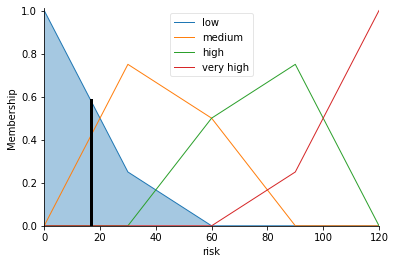

In [209]:
risk_factor.input['distance'] = 4
risk_factor.input['speed'] = 50
risk_factor.compute()
print(risk_factor.output['risk'])
risk.view(sim=risk_factor)